In [2]:
install.packages('ggplot2')
install.packages('readr')
install.packages('reshape')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [3]:
library('readr')
library('ggplot2')
library('reshape')
suppressWarnings(library('dplyr'))
options(warn=-1)


Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
url <- "https://raw.githubusercontent.com/waldeyr/Computer_Science_Undergraduate_Curricula_At_IFG/main/data/Disciplines.csv"
raw_disciplines <- read_csv(url, show_col_types = FALSE)
df_disciplines <- as.data.frame(raw_disciplines)

url <- "https://raw.githubusercontent.com/waldeyr/Computer_Science_Undergraduate_Curricula_At_IFG/main/data/Workload.csv"
raw_workload <- read_csv(url, show_col_types = FALSE)
df_workload <- as.data.frame(raw_workload)

In [5]:
df_disciplines <- melt(df_disciplines, id=c("Theme","Disciplines"), measure.vars = c(
    "Anápolis",
    "Formosa",
    "Goiânia",
    "Inhumas",
    "Jataí",
    "Luziânia",
    "Uruaçu"
))
head(df_disciplines)
dim(df_disciplines)

,Theme,Disciplines,variable,value
,<chr>,<chr>,<fct>,<dbl>
1,Technological formation,Administração de redes de computadores,Anápolis,NA
2,Technological formation,Administração de serviços para internet,Anápolis,NA
3,Math formation,Algebra linear,Anápolis,1
4,Groundwork formation,Algoritmos,Anápolis,1
5,Technological formation,Análise de sistemas,Anápolis,1
6,Technological formation,Arquitetura de computadores,Anápolis,2


[1] 539   4

In [6]:
df_workload <- melt(df_workload, id=c("Theme","Disciplines"), measure.vars = c(
    "Anápolis",
    "Formosa",
    "Goiânia",
    "Inhumas",
    "Jataí",
    "Luziânia",
    "Uruaçu"
))
head(df_workload)
dim(df_workload)

,Theme,Disciplines,variable,value
,<chr>,<chr>,<fct>,<dbl>
1,Technological formation,Administração de redes de computadores,Anápolis,NA
2,Technological formation,Administração de serviços para internet,Anápolis,NA
3,Math formation,Algebra linear,Anápolis,54
4,Groundwork formation,Algoritmos,Anápolis,54
5,Technological formation,Análise de sistemas,Anápolis,54
6,Technological formation,Arquitetura de computadores,Anápolis,108


[1] 539   4

In [7]:
colnames(df_disciplines) <- c("Theme","Disciplines","Campus","Amount")
df_disciplines <- df_disciplines[complete.cases(df_disciplines), ] # apenas casos sem NA; para usar NA => themes[is.na(themes)] <- 0

colnames(df_workload) <- c("Theme","Disciplines","Campus","Amount")
df_workload <- df_workload[complete.cases(df_workload), ] # apenas casos sem NA; para usar NA => themes[is.na(themes)] <- 0

In [8]:
head(df_disciplines)
dim(df_disciplines)
length(unique(df_disciplines[["Disciplines"]]))

,Theme,Disciplines,Campus,Amount
,<chr>,<chr>,<fct>,<dbl>
3,Math formation,Algebra linear,Anápolis,1
4,Groundwork formation,Algoritmos,Anápolis,1
5,Technological formation,Análise de sistemas,Anápolis,1
6,Technological formation,Arquitetura de computadores,Anápolis,2
8,Technological formation,Banco de dados,Anápolis,2
9,Math formation,Cálculo diferencial e integral,Anápolis,3


[1] 251   4

[1] 77

In [9]:
head(df_workload)
dim(df_workload)
length(unique(df_workload[["Disciplines"]]))

,Theme,Disciplines,Campus,Amount
,<chr>,<chr>,<fct>,<dbl>
3,Math formation,Algebra linear,Anápolis,54
4,Groundwork formation,Algoritmos,Anápolis,54
5,Technological formation,Análise de sistemas,Anápolis,54
6,Technological formation,Arquitetura de computadores,Anápolis,108
8,Technological formation,Banco de dados,Anápolis,108
9,Math formation,Cálculo diferencial e integral,Anápolis,189


[1] 250   4

[1] 77

In [10]:
my_colors <- c("#9fa0ff", "#4ea3d1", "#ff8b45", "#ffbf00", "#e63946", "#90d37c", "#a5a58d")
my_colors2 <- c("#03045e", "#0077b6", "#00b4d8", "#90e0ef", "#caf0f8")

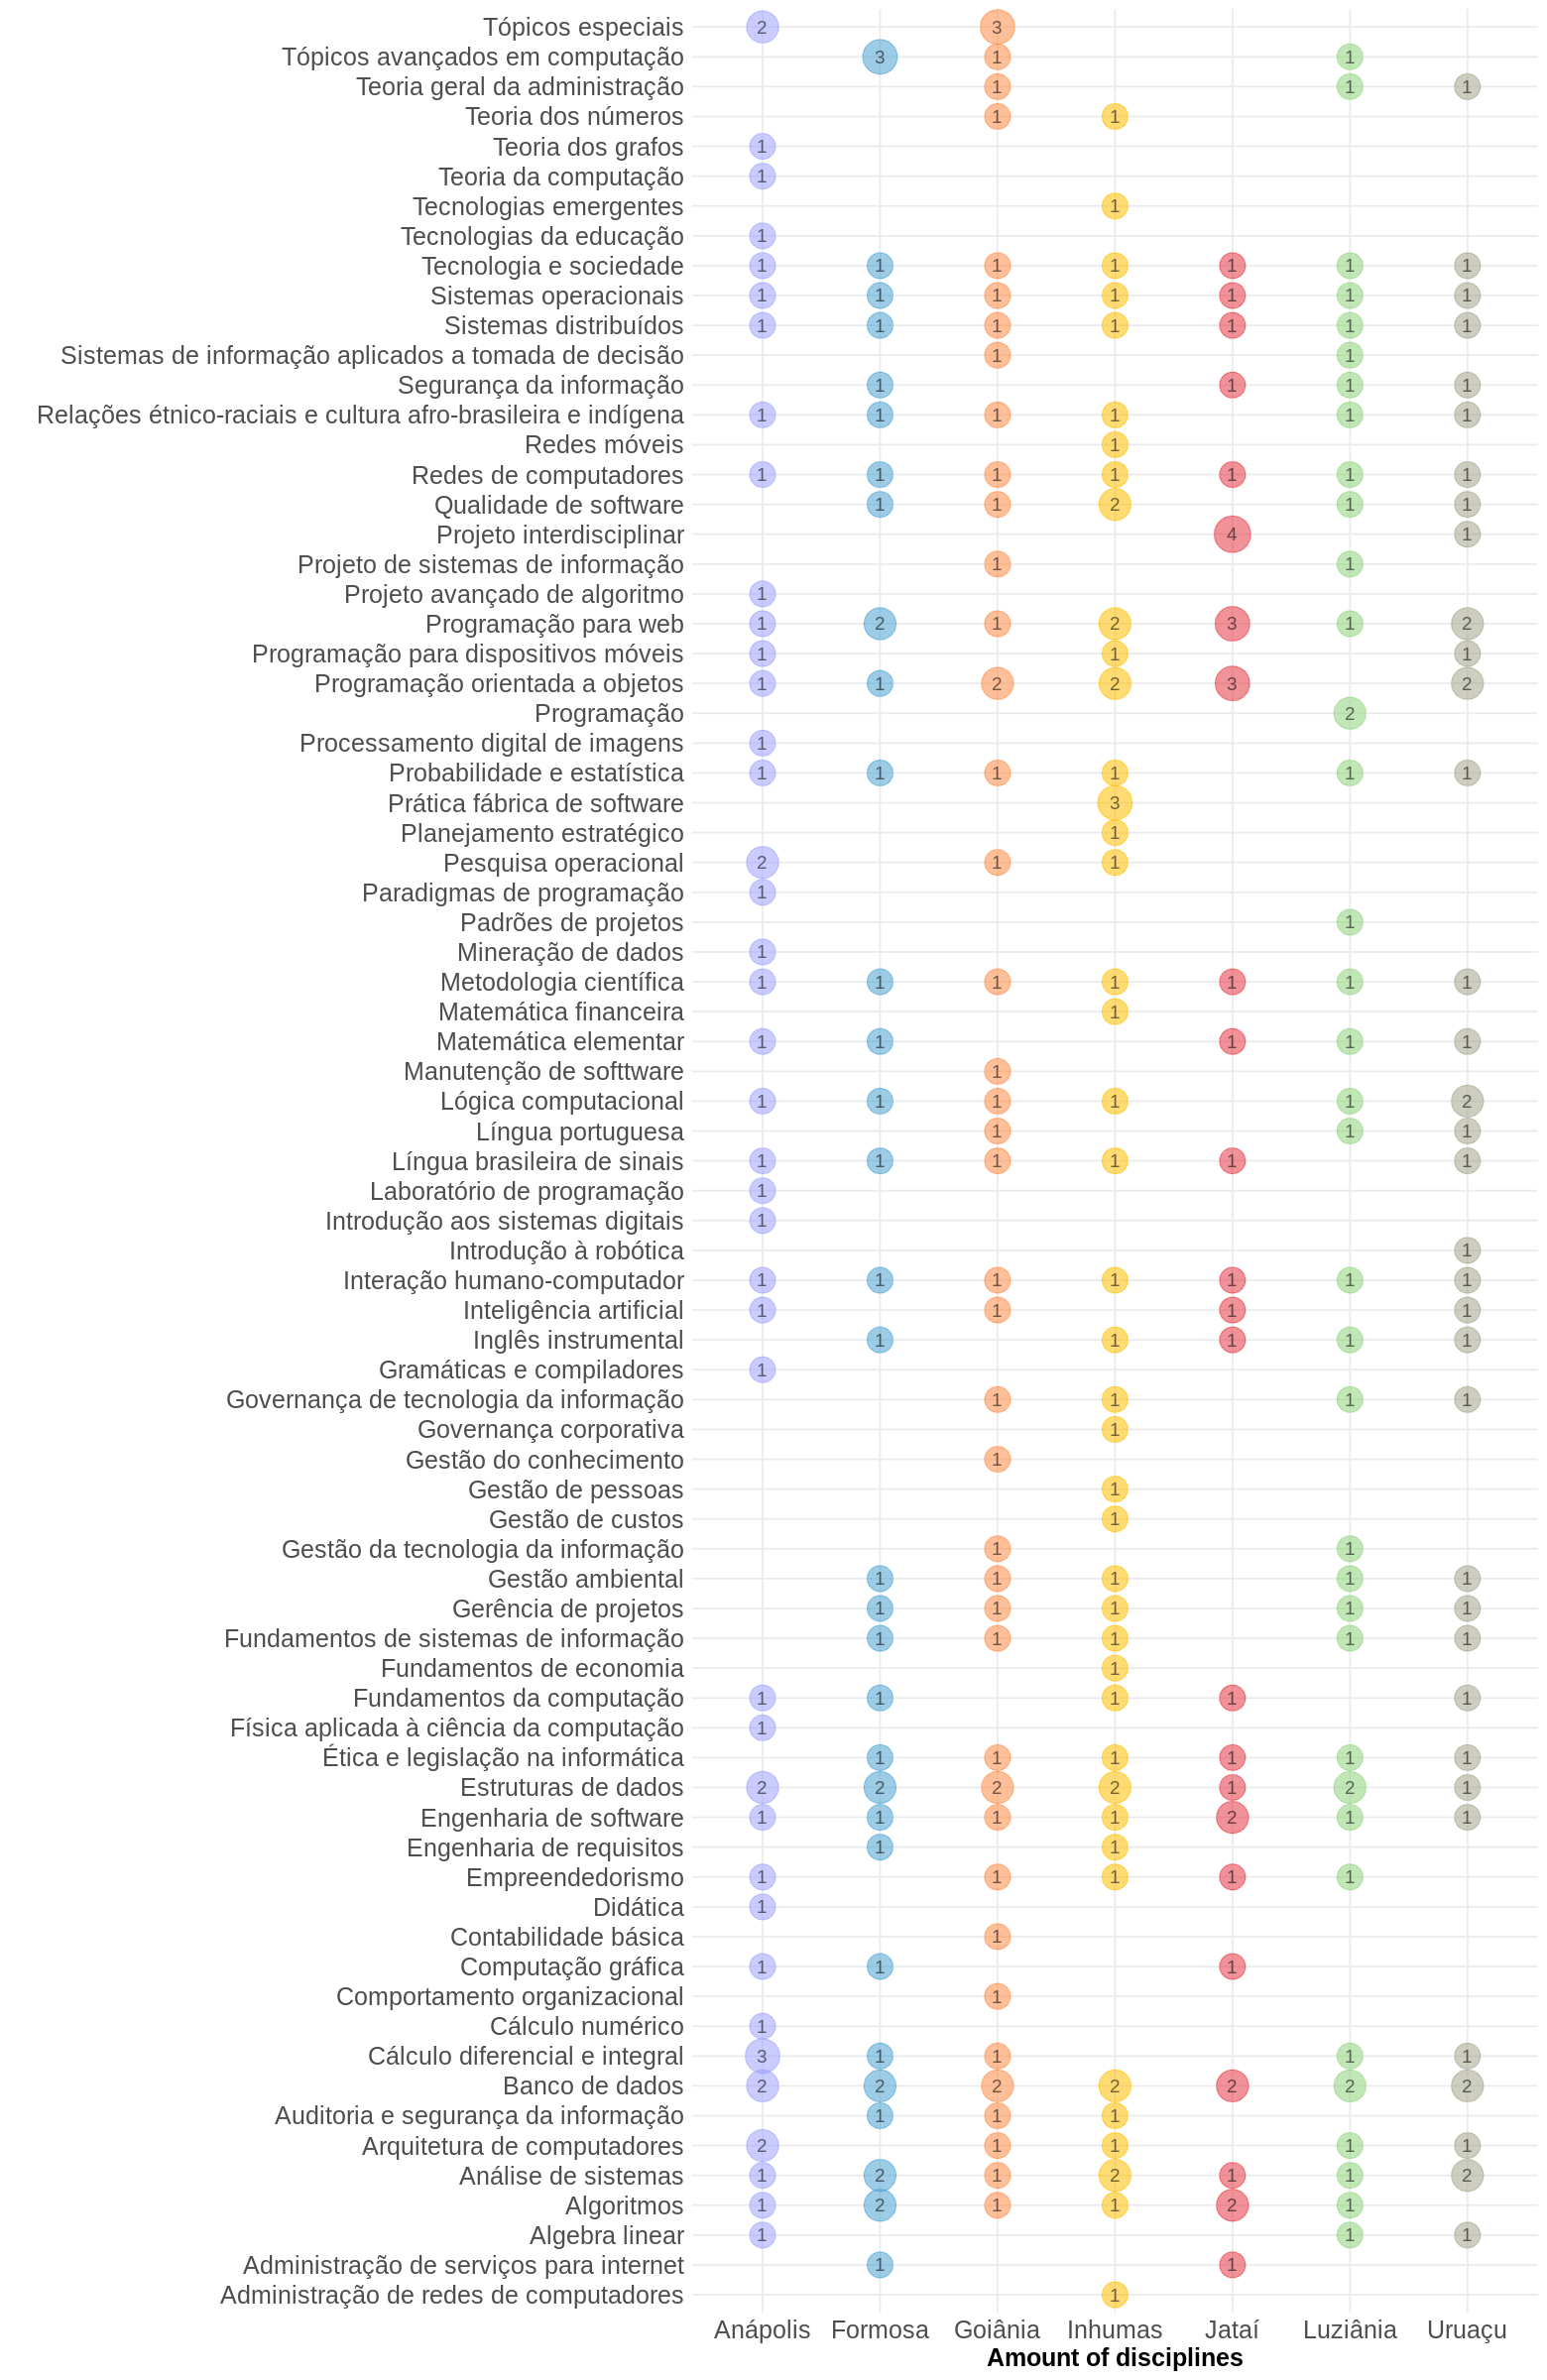

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 20)
g1 <- ggplot(df_disciplines, aes(x=`Campus`, y=`Disciplines`, color=`Campus`, fill=`Campus`, size=`Amount`, alpha=0.9)) + 
geom_point()+
geom_text(aes(label=`Amount`), hjust=.5, vjust=.5, size=4, color="black")+
theme_minimal()+
theme(axis.text=element_text(size=15), legend.text=element_text(size=16),  legend.title=element_text(size=18), axis.title=element_text(size=15,face="bold"))+
scale_color_manual(values=my_colors)+
guides(size = FALSE) +  
guides(alpha = FALSE) +  
guides(color = FALSE)+
guides(fill = FALSE) +
labs(x = "Amount of disciplines")+ 
labs(y = "")+ 
scale_size(range = c(7,10))
g1

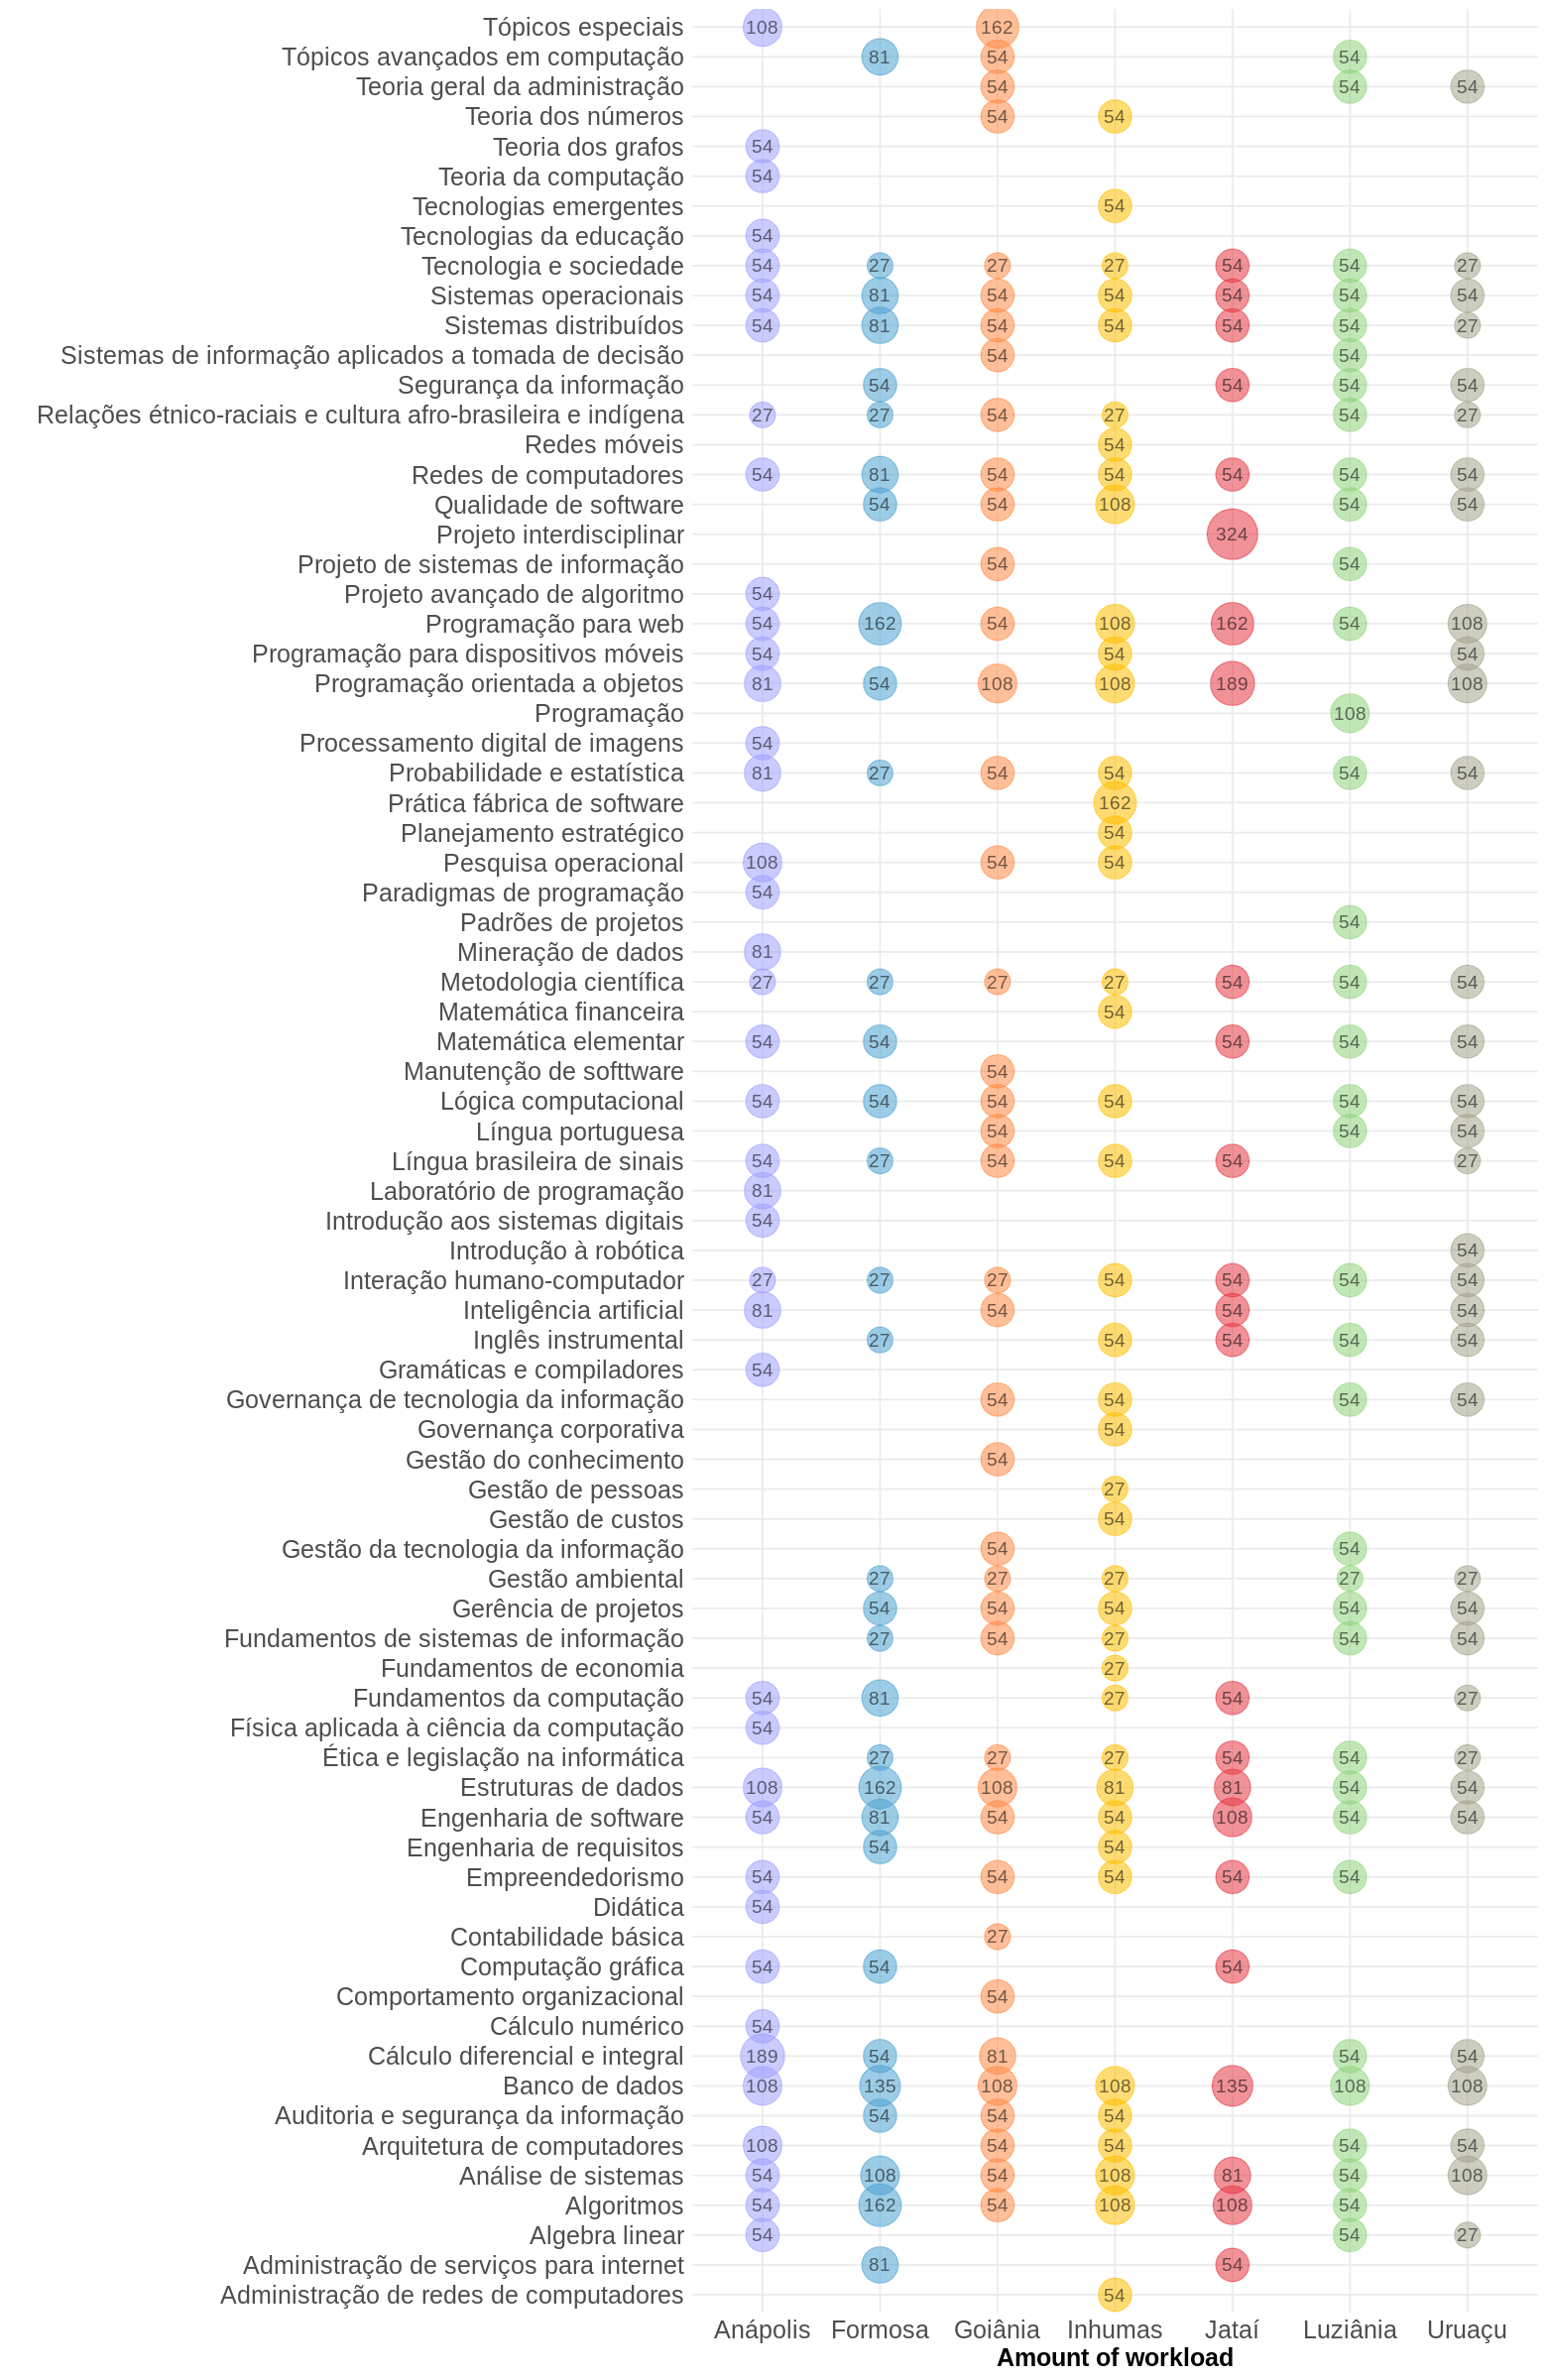

In [ ]:
options(repr.plot.width = 13, repr.plot.height = 20)
g2 <- ggplot(df_workload, aes(x=`Campus`, y=`Disciplines`, color=`Campus`, fill=`Campus`, size=`Amount`, alpha=0.9)) + 
geom_point() +
geom_text(aes(label=`Amount`), hjust=.5, vjust=.5, size=4, color="black")+
theme_minimal()+
theme(axis.text=element_text(size=15), legend.text=element_text(size=16),  legend.title=element_text(size=18), axis.title=element_text(size=15,face="bold"))+
scale_fill_manual(values=my_colors)+
scale_color_manual(values=my_colors)+
scale_shape_manual(values=c(21,22,23,24,25))+
guides(size = FALSE) +  
guides(alpha = FALSE) +  
guides(color = FALSE)+
guides(fill = FALSE) +
labs(x = "Amount of workload")+ 
labs(y = "")+ 
scale_size(range = c(7,14))
#scale_x_continuous(breaks = c(0,100,200,300,400,500))
g2

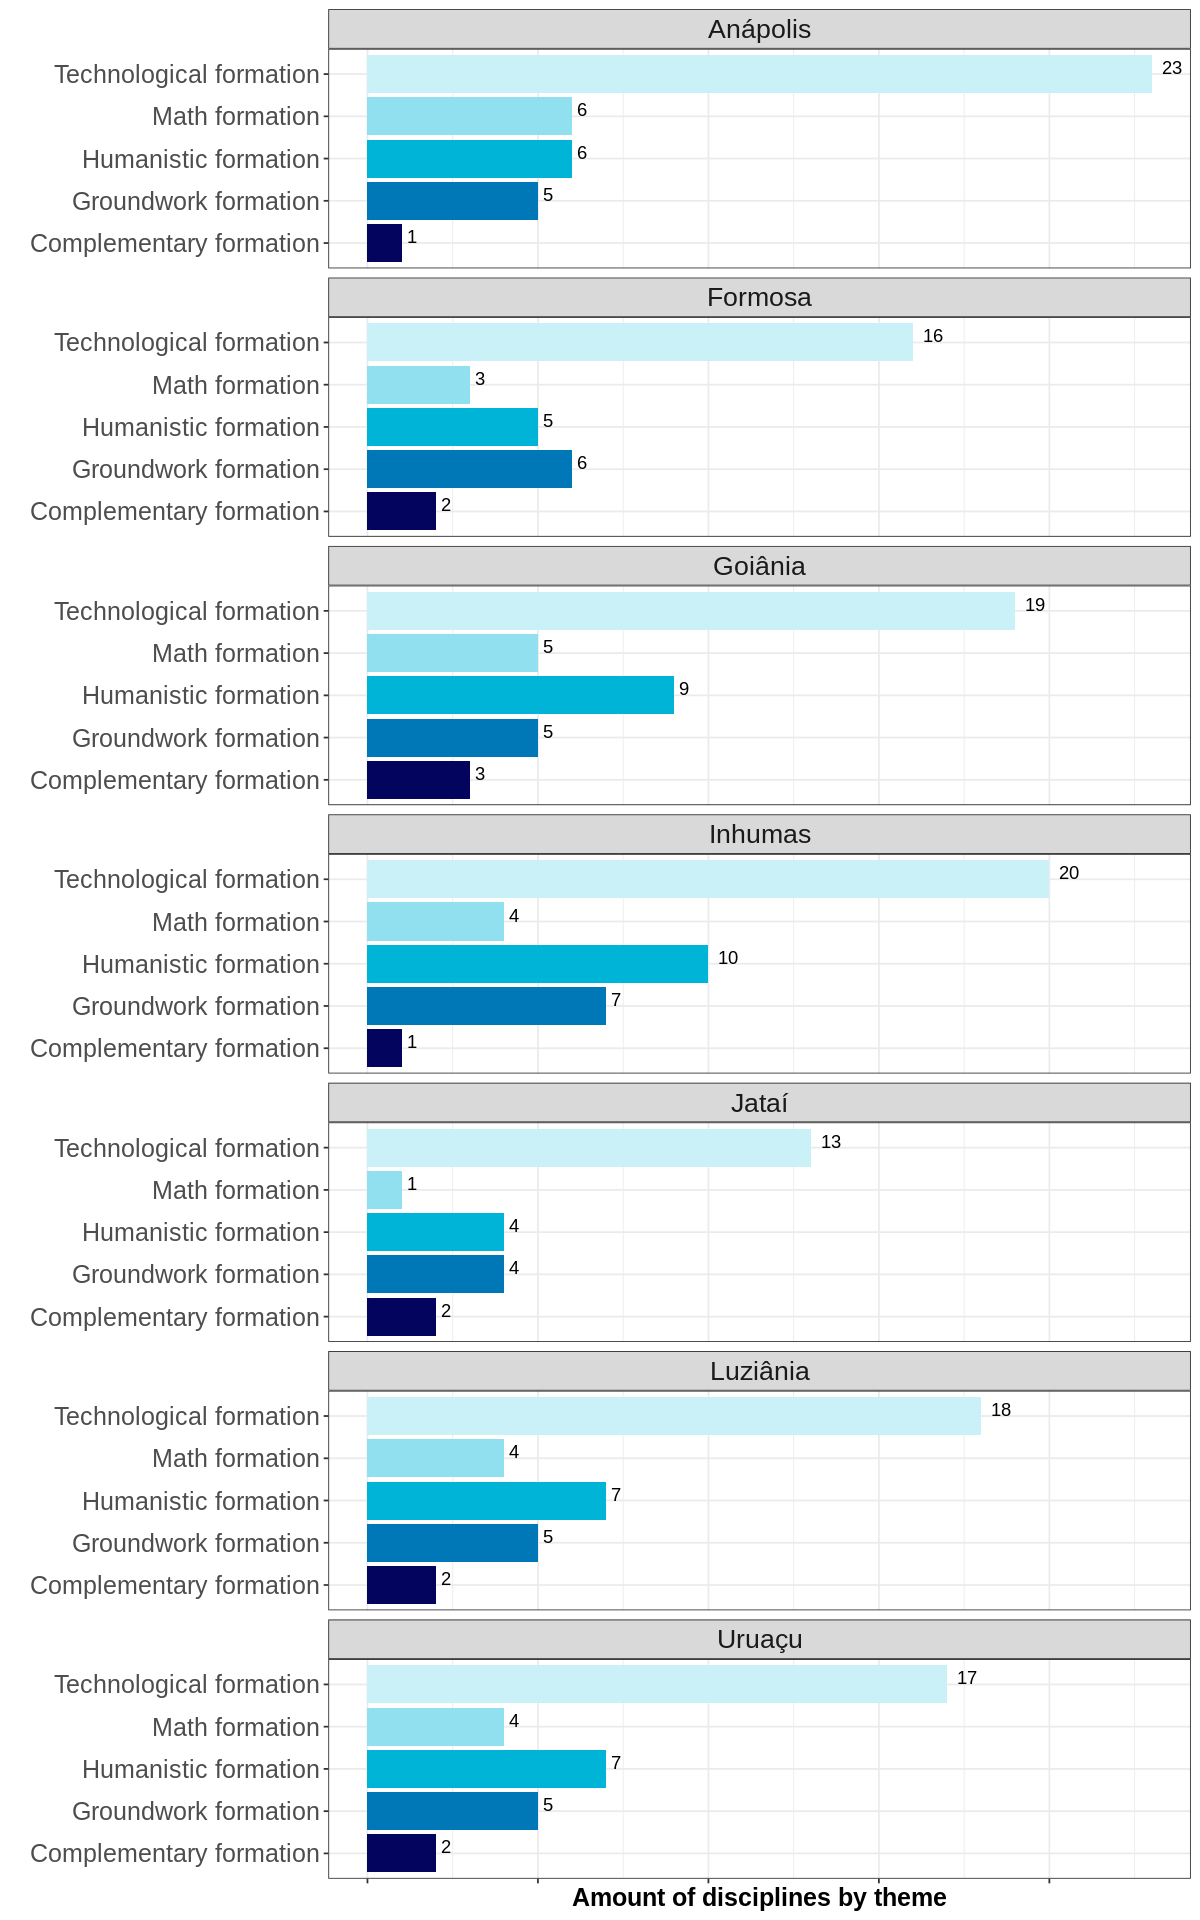

In [17]:
options(repr.plot.width = 10, repr.plot.height = 16)
g3 <- ggplot(df_disciplines, aes(`Theme`, fill=`Theme`)) + 
geom_bar(position = 'dodge', stat='count') +
geom_text(aes(label = ..count..), stat = "count", position=position_dodge(width=0.5), vjust=0, hjust=-.5)+
theme_bw()+
theme(axis.text=element_text(size=15),
      axis.title=element_text(size=15,face="bold"),
      strip.text = element_text(size=16),
      axis.text.x = element_blank()
)+
scale_fill_manual(values=my_colors2)+
scale_color_manual(values=my_colors2)+
guides(size = FALSE) +  
guides(fill = FALSE) + 
guides(alpha = FALSE) + 
labs(x = "")+ 
labs(y = "Amount of disciplines by theme")+ 
scale_size(range = c(5,13))+
facet_wrap(~`Campus`, ncol = 1)+
coord_flip()
g3

In [ ]:
totals <- df_workload %>%
	group_by(`Theme`) %>%
	summarise(total=sum(`Amount`))

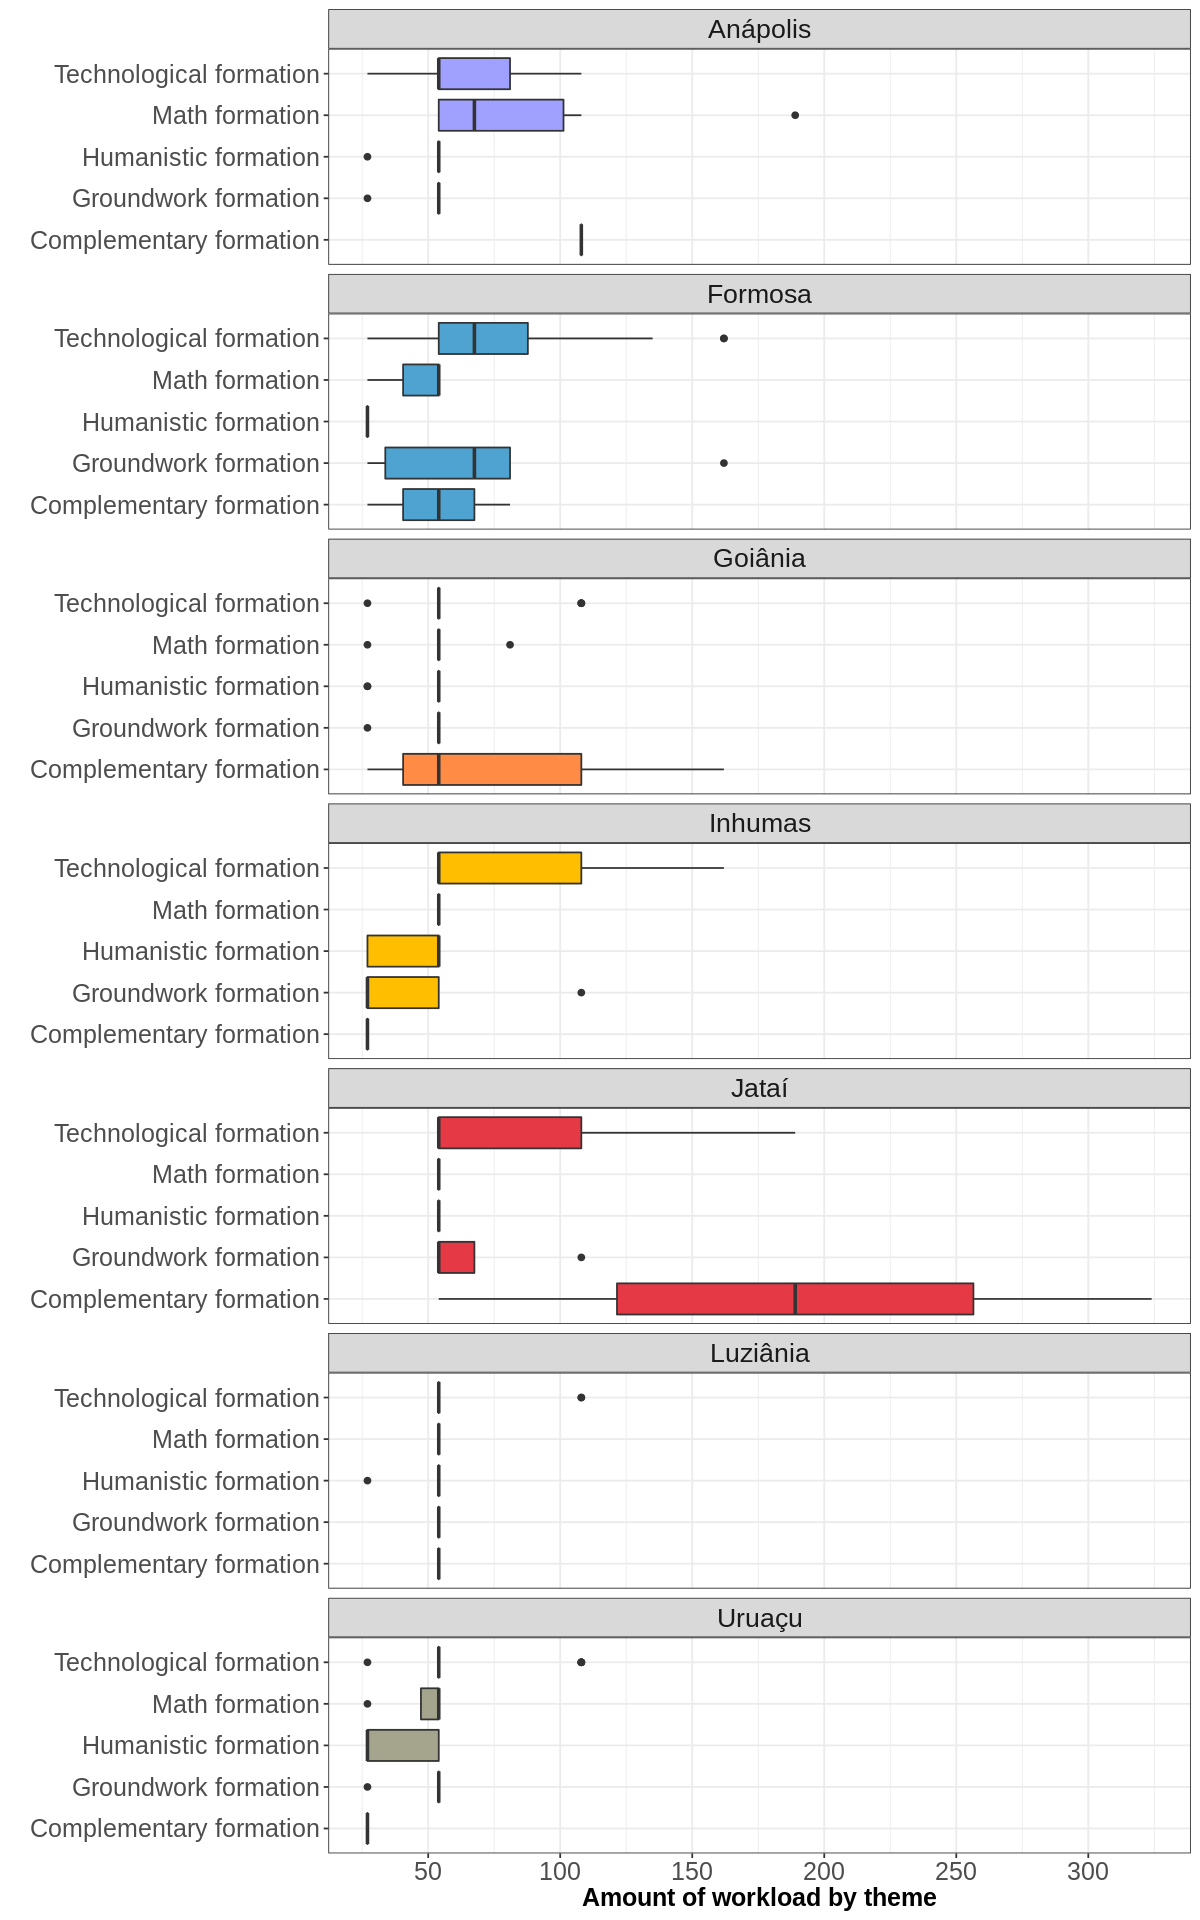

In [21]:
options(repr.plot.width = 10, repr.plot.height = 16)
g4 <- ggplot(data = df_workload) +
geom_boxplot( mapping = aes(x = Theme, y = Amount, fill = Campus)  )+
theme_bw()+
theme(axis.text=element_text(size=15),
      axis.title=element_text(size=15,face="bold"),
      strip.text = element_text(size=16),
      legend.position="none"
)+
guides(color = FALSE) + 
guides(fill = FALSE) + 
labs(x = "")+ 
labs(y = "Amount of workload by theme")+ 
guides(fill=guide_legend(title=""))+
scale_fill_manual(values=my_colors)+
facet_wrap(~`Campus`, ncol = 1)+
coord_flip()+
scale_y_continuous(breaks = c(0, 50, 100, 150, 200, 250, 300, 350))
g4